# Movie Analysis Project

## Overview: 
In this project, we launch a film studio based on findings using Pandas, Numpy, and SQL to perform statistical analysis, such as finding IQR and linear regression. 

## Business Understanding

Our client company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. 

We are analyzing muliple datasets to understand trends within genres, release date, and different budgets to understand all the variables that go into releasing a successful movie. 

We are then translating those findings into actionable insights that the new movie studio can use to help decide what type of films to create.

### Data Understanding

We analyzed several databases including:
- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB
- The Numbers

These data sets contained information about release dates, domestic gross, worldwide gross, budget, rating, genre, actors, actresses, and directors. We analyzed these datasets to draw several conclusions. 

We found that The Numbers database had similar information columns to Box Office Mojo, but more entries, and more precise numbers (Box Office Mojo had rounded values). Similarly, both Rotten Tomatoes and IMDB had genre and rating categories, but IMDB had both more entries and more data entries.

Thus we used a customized dataset which combined The Numbers database and IMDB's "movie_basics" and "movie_ratings" tables to get an overview of which movies have the highest domestic gross and return on investment. We are also interested in what time of year popular and successful movies are released to understand what genres perform the best during which seasons.


## Data Exploration

In [107]:
#imports
import numpy as np
import pandas as pd 
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading datasets to explore columns and values:

**Rotten Tomatoes:**

In [108]:
#load rotten tomatoes datasets in
rt_info = pd.read_csv('Data/rt.movie_info.tsv.gz', sep='\t', encoding='latin')
rt_review = pd.read_csv('Data/rt.reviews.tsv.gz', sep='\t', encoding='latin')

In [109]:
#overview of db information
print(rt_info.keys())
print(rt_info.info())
print(rt_info.describe())
rt_info.head()

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
                id
count  1560.000000
mean   1007.303846
std     579.

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [110]:
#overview of db information
print(rt_review.keys())
print(rt_review.info())
print(rt_review.describe())
rt_review.head()

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None
                 id    top_critic
count  54432.000000  54432.000000
mean    1045.706882      0.240594
std      586.657046      0.427448
min        3.000000      0.000000
25%      542.000000      0.000000
50%     1083.000000      0.000000
75%     1541.000000      0.000000
max     2000.000000      1.000000


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


**Box Office Mojo:** 

In [111]:
#read in data from box office mojo
bom_raw_df = pd.read_csv('data/bom.movie_gross.csv.gz')

In [112]:
#overview of db information
print(bom_raw_df.keys())
print(bom_raw_df.info())
print(bom_raw_df.describe())
bom_raw_df.head()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


**TheMovieDB:**

In [113]:
#read in database
df_tmdb = pd.read_csv("data/tmdb.movies.csv.gz", parse_dates=['release_date'])

In [114]:
#overview of db information
print(df_tmdb.keys())
print(df_tmdb.info())
print(df_tmdb.describe())
df_tmdb.head()

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), obje

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


**The Numbers:**

In [115]:
#read in database
tn_raw_df = pd.read_csv("data/tn.movie_budgets.csv.gz", parse_dates=['release_date'])

In [116]:
#overview of db information
print(tn_raw_df.keys())
print(tn_raw_df.info())
print(tn_raw_df.describe())
tn_raw_df.head()

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB
None
                id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**IMDB:**

In [117]:
#Read in file and look at table names.
path = "data/im.db"
conn = sqlite3.connect(path)

In [118]:
#Look at master schema of all tables
df_imdb = pd.read_sql("""
            SELECT *
            FROM sqlite_master
""", conn)
df_imdb[df_imdb["type"] == "table"]

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Impute each table into a Dataframe to look at

#### movie_basics
movie_id  |  primary_title  |  original_title  |  start_year  |  runtime_minutes  |  genres

In [119]:
movie_basics = pd.read_sql("""
            SELECT *
            FROM movie_basics
""", conn)

In [120]:
print(movie_basics.info())
print(movie_basics.describe(include="all"))
movie_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
         movie_id primary_title original_title     start_year  \
count      146144        146144         146123  146144.000000   
unique     146144        136071         137773            NaN   
top     tt8400716          Home         Broken            NaN   
freq            1            24             19            NaN   
mean          NaN           NaN            NaN    2014.621798   
std           NaN           NaN            NaN       2.73

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### directors
movie_id  |  person_id

In [121]:
directors = pd.read_sql("""
            SELECT *
            FROM directors
""", conn)

In [122]:
print(directors.info())
print(directors.describe(include="all"))
directors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None
         movie_id  person_id
count      291174     291174
unique     140417     109253
top     tt4050462  nm6935209
freq         3818        238


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


#### known_for
person_id  |  movie_id

In [123]:
known_for = pd.read_sql("""
            SELECT *
            FROM known_for
""", conn)

In [124]:
print(known_for.info())
print(known_for.describe(include="all"))
known_for.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB
None
        person_id   movie_id
count     1638260    1638260
unique     576444     514781
top     nm4291122  tt0806910
freq            6        633


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


#### movie_akas
movie_id  |  ordering  |  title  |  region  |  language  |  types  |  attributes  |  is_original_title

In [125]:
movie_akas = pd.read_sql("""
            SELECT *
            FROM movie_akas
""", conn)

In [126]:
print(movie_akas.info())
print(movie_akas.describe(include="all"))
movie_akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None
         movie_id       ordering       title  region language        types  \
count      331703  331703.000000      331703  278410    41715       168447   
unique     122302            NaN      252781     213       76           10   
top     tt2488496            NaN  Robin Hood      US       en  imdbDisplay   
freq           61   

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


#### movie_ratings
movie_id  |  averagerating  |  numvotes

In [127]:
movie_ratings = pd.read_sql("""
            SELECT *
            FROM movie_ratings
""", conn)

In [128]:
print(movie_ratings.info())
print(movie_ratings.describe(include="all"))
movie_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
         movie_id  averagerating      numvotes
count       73856   73856.000000  7.385600e+04
unique      73856            NaN           NaN
top     tt2088893            NaN           NaN
freq            1            NaN           NaN
mean          NaN       6.332729  3.523662e+03
std           NaN       1.474978  3.029402e+04
min           NaN       1.000000  5.000000e+00
25%           NaN       5.500000  1.400000e+01
50%           NaN       6.500000  4.900000e+01
75%           NaN       7.400000  2.820000e+02
max           NaN      10.000000  1.841066e+06


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### persons
person_id  |  primary_name  |  birth_year  |  death_year  |  primary_profession

In [129]:
persons = pd.read_sql("""
            SELECT *
            FROM persons
""", conn)

In [130]:
print(persons.info())
print(persons.describe(include="all"))
persons.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None
        person_id   primary_name    birth_year   death_year primary_profession
count      606648         606648  82736.000000  6783.000000             555308
unique     606648         577203           NaN          NaN               8647
top     nm0386871  Michael Brown           NaN          NaN              actor
freq            1             16           NaN          NaN              88306
mean          NaN            NaN   1967.043826  2000.523367                NaN
std     

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


#### principals
movie_id  |  ordering  |  person_id  |  category  |  job  |  characters

In [131]:
principals = pd.read_sql("""
            SELECT *
            FROM principals
""", conn)

In [132]:
print(principals.info())
print(principals.describe(include="all"))
principals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None
         movie_id      ordering  person_id category       job   characters
count     1028186  1.028186e+06    1028186  1028186    177684       393360
unique     143454           NaN     604546       12      2965       174762
top     tt2609326           NaN  nm1930572    actor  producer  ["Himself"]
freq           10           NaN        378   256718    108168        43584
mean          NaN  4.739847e+00        NaN      NaN       NaN          NaN
std           NaN  2.747446e+00        NaN    

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


#### writers
movie_id  |  person_id

In [133]:
writers = pd.read_sql("""
            SELECT *
            FROM writers
""", conn)

In [134]:
print(writers.info())
print(writers.describe(include="all"))
writers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
None
         movie_id  person_id
count      255873     255873
unique     110261     122576
top     tt4050462  nm6935209
freq         3818        543


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


## Data Preparation

We found that The Numbers database had similar information columns to Box Office Mojo, but more entries, and more precise numbers (Box Office Mojo had rounded values). Similarly, both Rotten Tomatoes and IMDB had genre and rating categories, but IMDB had both more entries and more data entries. Thus we will combine The Numbers with IMDB's databases.

**Creating Master DB**

First we clean The Numbers database so that release_date and movie are strings, and production_budget, domestic_gross, worldwide_gross are integers

In [135]:
#run this cell only once
#production budget to int
tn_raw_df['production_budget'] = tn_raw_df["production_budget"].str.replace("$",'').str.replace(",",'')
tn_raw_df['production_budget'] = tn_raw_df["production_budget"].astype(int)

#domestic gross to int
tn_raw_df['domestic_gross'] = tn_raw_df["domestic_gross"].str.replace("$",'').str.replace(",",'')
tn_raw_df['domestic_gross'] = tn_raw_df["domestic_gross"].astype(int)

#worldwide_gross to int
tn_raw_df['worldwide_gross'] = tn_raw_df["worldwide_gross"].str.replace("$",'').str.replace(",",'')
tn_raw_df['worldwide_gross'] = tn_raw_df["worldwide_gross"].astype('int64')

tn_df = tn_raw_df.copy()

**Dealing with Inflation** 

Next we create new columns *DG_AI* (domestic gross after inflation) and *PB_AI* (production budget after inflation) to have a more accurate view of movie budget & return within the years

- Source: https://data.bls.gov/cgi-bin/cpicalc.pl

In [136]:
### INFLATION CALCULATIONS
# Create release_year from release_date
tn_df['release_year'] = pd.DatetimeIndex(tn_df['release_date']).year

#Only take movies from 2010 onwards
tn_df = tn_df[tn_df["release_date"] >= "2010"]

#Create inflation_ratios which is then used to map release_year to create a column inflation_ratios
#which is a column that has the dollar to a 2023 ratio
tn_df['inflation_ratio'] = 1

inflation_ratios = {
    2010: 1.42,
    2011: 1.40,
    2012: 1.36,
    2013: 1.34,
    2014: 1.32,
    2015: 1.32,
    2016: 1.30,
    2017: 1.27,
    2018: 1.24,
    2019: 1.22,
    2020: 1.19
}

tn_df['inflation_ratio'] = tn_df['release_year'].replace(inflation_ratios)

#Create Column DG_AI which means domestic gross after inflation
#And a Column PB_AI which is production budget after inflation
tn_df['DG_AI']=tn_df["domestic_gross"]*tn_df["inflation_ratio"]
tn_df["PB_AI"]=tn_df["production_budget"]*tn_df["inflation_ratio"]

tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,inflation_ratio,DG_AI,PB_AI
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,1.40,3.374894e+08,574840000.0
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1.22,5.217007e+07,427000000.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1.32,6.058877e+08,436392000.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1.27,7.876304e+08,402590000.0
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1.32,1.236394e+09,403920000.0


- Next we create a column **season** based off of dates, to be able to view trends based on season

In [137]:
## CREATING COLUMN FOR SEASONS
tn_df["release_month"] = pd.DatetimeIndex(tn_df["release_date"]).month

seasons = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

tn_df['season'] = tn_df['release_month'].map(seasons)

#View work
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,inflation_ratio,DG_AI,PB_AI,release_month,season
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,1.40,3.374894e+08,574840000.0,5,Spring
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1.22,5.217007e+07,427000000.0,6,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1.32,6.058877e+08,436392000.0,5,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1.27,7.876304e+08,402590000.0,12,Winter
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1.32,1.236394e+09,403920000.0,12,Winter


- We also want a column *ROI* which is domestic_gross / production_budget

In [138]:
#Create column ROI which is domestic_gross / production_budget 
tn_df['ROI'] = tn_df['domestic_gross'] / tn_df["production_budget"]

 - Next we join the IMDB databases we need, *movie_basics*, and *movie_ratings* into a dataframe called *joinedIMDB*

In [139]:
joinedIMDB = pd.read_sql("""
            SELECT movie_basics.movie_id AS movieID, primary_title, start_year, runtime_minutes, genres 
            FROM movie_basics
                JOIN movie_ratings 
                    ON movieID = movie_ratings.movie_id
""", conn)
joinedIMDB.info()
joinedIMDB.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movieID          73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


,movieID,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


- Next we combine tn_db with joinedIMDB into our master dataframe, **movie_df**

In [140]:
movie_df = None
movie_df = tn_df.merge(joinedIMDB, left_on='movie', right_on="primary_title")

list(movie_df.columns.values)

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'release_year',
 'inflation_ratio',
 'DG_AI',
 'PB_AI',
 'release_month',
 'season',
 'ROI',
 'movieID',
 'primary_title',
 'start_year',
 'runtime_minutes',
 'genres']

**Reorganize Columns for ease of reading:**

In [141]:
movie_df = movie_df[['id', 'movieID', 'movie', 'release_date', "release_month", "release_year", "season", "production_budget", "domestic_gross", "worldwide_gross", "ROI", "inflation_ratio", "PB_AI", "DG_AI", "runtime_minutes", "genres"]]

In [142]:
movie_df

,id,movieID,movie,release_date,release_month,release_year,season,production_budget,domestic_gross,worldwide_gross,ROI,inflation_ratio,PB_AI,DG_AI,runtime_minutes,genres
0,2,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,Spring,410600000,241063875,1045663875,0.587101,1.40,574840000.0,3.374894e+08,136.0,"Action,Adventure,Fantasy"
1,3,tt6565702,Dark Phoenix,2019-06-07,6,2019,Summer,350000000,42762350,149762350,0.122178,1.22,427000000.0,5.217007e+07,113.0,"Action,Adventure,Sci-Fi"
2,4,tt2395427,Avengers: Age of Ultron,2015-05-01,5,2015,Spring,330600000,459005868,1403013963,1.388403,1.32,436392000.0,6.058877e+08,141.0,"Action,Adventure,Sci-Fi"
3,7,tt4154756,Avengers: Infinity War,2018-04-27,4,2018,Spring,300000000,678815482,2048134200,2.262718,1.24,372000000.0,8.417312e+08,149.0,"Action,Adventure,Sci-Fi"
4,9,tt0974015,Justice League,2017-11-17,11,2017,Fall,300000000,229024295,655945209,0.763414,1.27,381000000.0,2.908609e+08,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,59,tt1781935,The Ridges,2011-11-25,11,2011,Fall,17300,0,0,0.000000,1.40,24220.0,0.000000e+00,89.0,"Drama,Horror,Thriller"
2207,62,tt3973612,Stories of Our Lives,2014-12-31,12,2014,Winter,15000,0,0,0.000000,1.32,19800.0,0.000000e+00,60.0,Drama
2208,73,tt1880418,Newlyweds,2012-01-13,1,2012,Winter,9000,4584,4584,0.509333,1.36,12240.0,6.234240e+03,95.0,"Comedy,Drama"
2209,78,tt7837402,Red 11,2018-12-31,12,2018,Winter,7000,0,0,0.000000,1.24,8680.0,0.000000e+00,77.0,"Horror,Sci-Fi,Thriller"


**Adding binary flags for Genre**

In [143]:
#Checking for Nulls
movie_df["genres"].isna().sum()

8

In [144]:
#Dropping 8 rows with Null genres out of 2211 total rows
movie_df = movie_df.dropna(subset=["genres"])

In [145]:
#Genres from IMDB https://help.imdb.com/article/contribution/titles/genres/GZDRMS6R742JRGAG#
genre_list = ["Action", "Adult", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy", "Film-Noir", "Game-Show", "History", "Horror", "Musical", "Music", "Mystery", "News", "Reality-TV", "Romance", "Sci-Fi", "Short", "Sport", "Talk-Show", "Thriller", "War", "Western"]
for genre in genre_list:
    movie_df[genre]=0
    movie_df.loc[movie_df["genres"].str.contains(genre), genre]=1

## Data Analysis
---

In [147]:
#Analyzing mean, median for budget, and domestic gross

#budget (calculated for inflation)
prod_mean = movie_df['PB_AI'].mean()
prod_median = movie_df['PB_AI'].median()
print(f'Production Budget Mean: {prod_mean}')
print(f'Production Budget Median: {prod_median}')

#domestic gross (calculated for inflation)
dg_mean = movie_df['DG_AI'].mean()
dg_median = movie_df['DG_AI'].median()
print(f'Domestic Gross Mean: {dg_mean}')
print(f'Domestic Gross Median: {dg_median}')

Production Budget Mean: 49173898.952991374
Production Budget Median: 23400000.0
Domestic Gross Mean: 61073985.14764412
Domestic Gross Median: 22091297.62


In [148]:
#View Pearson Correlation for different seasons
#Fall:
movie_df[["production_budget", "domestic_gross", "release_year", "DG_AI", "PB_AI", "ROI"]].loc[movie_df['season']=="Fall"].corr() 

,production_budget,domestic_gross,release_year,DG_AI,PB_AI,ROI
production_budget,1.000000,0.723253,0.071859,0.724469,0.998683,-0.074654
domestic_gross,0.723253,1.000000,0.080061,0.999162,0.720272,0.258386
release_year,0.071859,0.080061,1.000000,0.056128,0.039753,-0.023277
DG_AI,0.724469,0.999162,0.056128,1.000000,0.723131,0.259167
PB_AI,0.998683,0.720272,0.039753,0.723131,1.000000,-0.075641
ROI,-0.074654,0.258386,-0.023277,0.259167,-0.075641,1.000000


In [149]:
#Winter:
movie_df[["production_budget", "domestic_gross", "release_year", "DG_AI", "PB_AI", "ROI"]].loc[movie_df['season']=="Winter"].corr() 

,production_budget,domestic_gross,release_year,DG_AI,PB_AI,ROI
production_budget,1.000000,0.619043,0.049469,0.625876,0.998582,-0.067412
domestic_gross,0.619043,1.000000,0.098447,0.998952,0.611928,0.313062
release_year,0.049469,0.098447,1.000000,0.073877,0.014714,0.097555
DG_AI,0.625876,0.998952,0.073877,1.000000,0.620640,0.310985
PB_AI,0.998582,0.611928,0.014714,0.620640,1.000000,-0.068613
ROI,-0.067412,0.313062,0.097555,0.310985,-0.068613,1.000000


In [150]:
#Spring:
movie_df[["production_budget", "domestic_gross", "release_year", "DG_AI", "PB_AI", "ROI"]].loc[movie_df['season']=="Spring"].corr() 

,production_budget,domestic_gross,release_year,DG_AI,PB_AI,ROI
production_budget,1.000000,0.770213,0.027784,0.774200,0.998584,-0.079143
domestic_gross,0.770213,1.000000,0.074757,0.998681,0.764385,0.162484
release_year,0.027784,0.074757,1.000000,0.046782,-0.003435,0.145651
DG_AI,0.774200,0.998681,0.046782,1.000000,0.770595,0.158942
PB_AI,0.998584,0.764385,-0.003435,0.770595,1.000000,-0.079997
ROI,-0.079143,0.162484,0.145651,0.158942,-0.079997,1.000000


In [151]:
#Summer
movie_df[["production_budget", "domestic_gross", "release_year", "DG_AI", "PB_AI", "ROI"]].loc[movie_df['season']=="Summer"].corr() 

,production_budget,domestic_gross,release_year,DG_AI,PB_AI,ROI
production_budget,1.000000,0.728361,0.027672,0.731123,0.998698,-0.063345
domestic_gross,0.728361,1.000000,0.051673,0.998916,0.728124,0.034329
release_year,0.027672,0.051673,1.000000,0.026806,-0.003764,0.035945
DG_AI,0.731123,0.998916,0.026806,1.000000,0.732728,0.034162
PB_AI,0.998698,0.728124,-0.003764,0.732728,1.000000,-0.063693
ROI,-0.063345,0.034329,0.035945,0.034162,-0.063693,1.000000


## Visualizations
---

### Determining The Right Budget

Text(0.5, 1.0, 'Production Budget Graph')

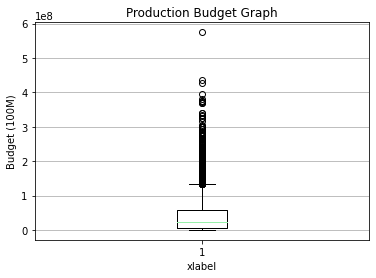

In [152]:
fig, ax = plt.subplots()
data = movie_df['PB_AI']
ax.boxplot(data, 0)
ax.set_xlabel('xlabel')
ax.set_ylabel('Budget (100M)')
ax.yaxis.grid(True)
plt.title('Production Budget Graph')

We notice there is a high amount of outliers. It is hard to view our IQR

median: 23400000.0
upper_quartile: 57120000.00000001
lower_quartile: 6350000.0
upper_whisker: 132080000.0
lower_whisker 1848.0


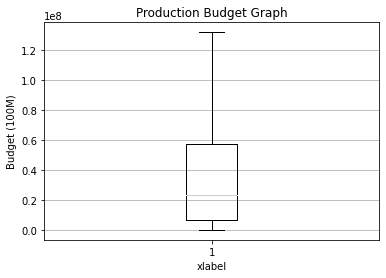

In [153]:
## Ignoring outliers on our graph
fig, ax = plt.subplots()
data = movie_df['PB_AI']
ax.boxplot(data, 0, "")
ax.set_xlabel('xlabel')
ax.set_ylabel('Budget (100M)')
ax.yaxis.grid(True)
plt.title('Production Budget Graph')

median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

print("median:", median)
print("upper_quartile:", upper_quartile)
print("lower_quartile:", lower_quartile)

print("upper_whisker:", upper_whisker)
print("lower_whisker", lower_whisker)


- Our upper quartile range is 57,120,000. 
- Lower quartile range is 6,350,000
- Upper whisker is extremely higher than our upper quartile. This means theres heavy outliers affecting this range.
- 75% of all movies are under a budget of 57 million dollars. This would represent a common and safe value for our movie.

#### We will choose 57 million as our budget.
--- 

### ROI per Genre:

#### Count of Genres with Positive ROI

In [154]:
#Create new Dataframe of all films within budget with Positive (greater than 1) domestic ROI
prod_budget_max = 57120000
budget_films = movie_df[movie_df["PB_AI"]<=prod_budget_max]
pos_ROI = budget_films[budget_films["ROI"]>1]

In [155]:
#Find the number of each genre within the budget and ROI constraints
flag_sum = []
for genre in genre_list:
    g = sum(pos_ROI[genre])
    flag_sum.append(g)
#Zip into dictionary to look at numbers
genre_counts = dict(zip(genre_list, flag_sum))
genre_counts

{'Action': 77,
 'Adult': 0,
 'Adventure': 44,
 'Animation': 6,
 'Biography': 59,
 'Comedy': 219,
 'Crime': 84,
 'Documentary': 38,
 'Drama': 370,
 'Family': 27,
 'Fantasy': 27,
 'Film-Noir': 0,
 'Game-Show': 0,
 'History': 18,
 'Horror': 109,
 'Musical': 1,
 'Music': 32,
 'Mystery': 71,
 'News': 0,
 'Reality-TV': 0,
 'Romance': 109,
 'Sci-Fi': 31,
 'Short': 0,
 'Sport': 16,
 'Talk-Show': 0,
 'Thriller': 116,
 'War': 6,
 'Western': 1}

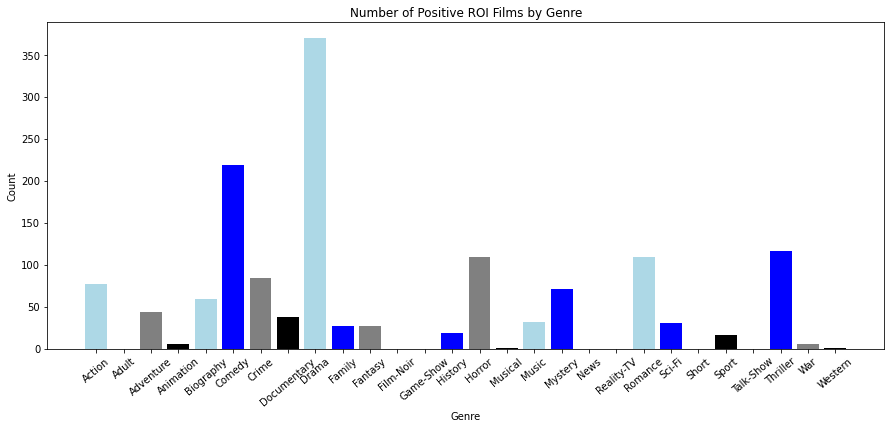

In [156]:
#Graph number of positive ROI films by Genre
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(
    x=genre_list,
    height=flag_sum,
    color=['lightblue', 'blue', 'gray', 'black'])
ax.set_title("Number of Positive ROI Films by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation=40);

- Drama has the highest number of positive ROI films. 
- We will choose drama as our genre of interest
- We take the mode value here because sets realistic expectations of audience interest and a safe investment for a first time studio 

#### We choose Drama as our recommended genre
--- 

### Season with best ROI for Drama within Budget

In [157]:
#Create Dataframe of only Drama films within budget
drama_films = budget_films[budget_films["Drama"]==1]
#Organize by season
season_list = ["Spring", "Summer", "Fall", "Winter"]
season_mean = []
for season in season_list:
    s = drama_films.loc[drama_films["season"]==season, "ROI"].mean()
    season_mean.append(s)
#Zip into dictionary to look at numerically
season_ROI = dict(zip(season_list, season_mean))
season_ROI

{'Spring': 1.4045152947786659,
 'Summer': 2.1562939891075548,
 'Fall': 1.4204801086637204,
 'Winter': 1.6397569506626961}

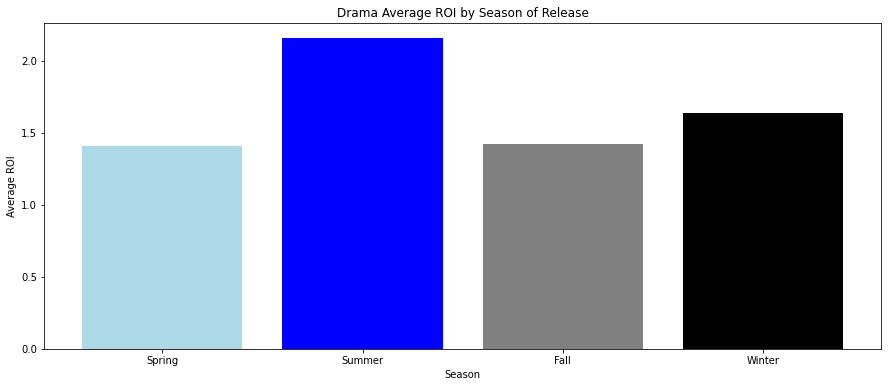

In [158]:
#Graph
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(
    x=season_list,
    height=season_mean,
    color=['lightblue', 'blue', 'gray', 'black'])
ax.set_title("Drama Average ROI by Season of Release")
ax.set_xlabel("Season")
ax.set_ylabel("Average ROI");

- Summer has the highest average ROI with above 200%. 

#### We recommend summer as the best release time for our film
--- 

### Prediction:

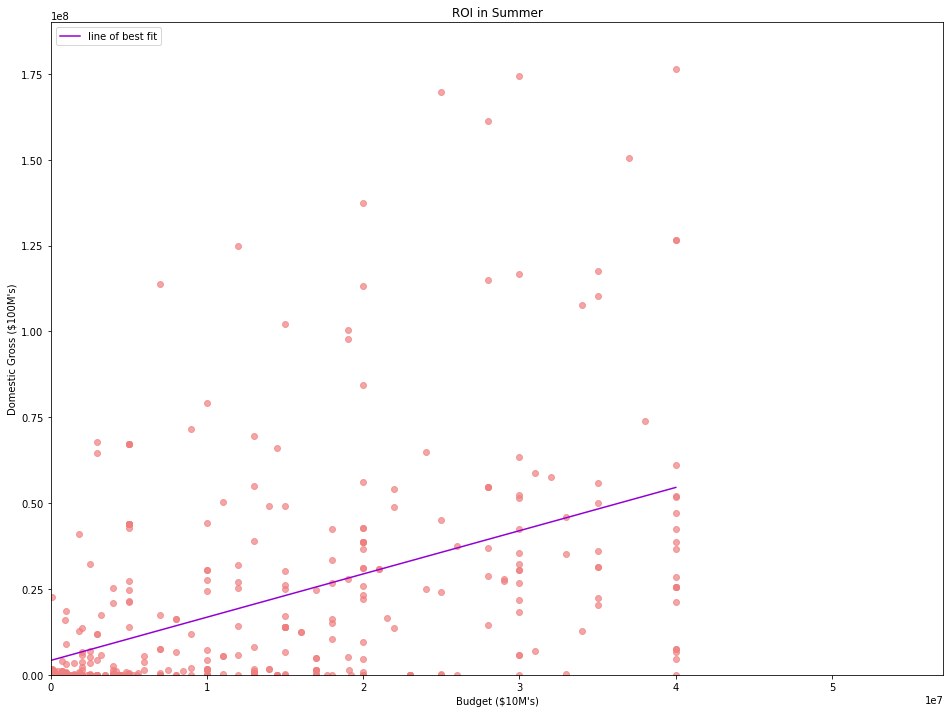

In [159]:
#Plotting Linear Regression
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize = (16, 12))
x_summer = budget_films["production_budget"].loc[budget_films['season']=="Summer"]
y_summer = budget_films['domestic_gross'].loc[budget_films['season']=="Summer"]
x_winter = budget_films["production_budget"].loc[budget_films['season']=="Winter"]
y_winter = budget_films['domestic_gross'].loc[budget_films['season']=="Winter"]
x_spring = budget_films["production_budget"].loc[budget_films['season']=="Spring"]
y_spring = budget_films['domestic_gross'].loc[budget_films['season']=="Spring"]
x_fall = budget_films["production_budget"].loc[budget_films['season']=="Fall"]
y_fall = budget_films['domestic_gross'].loc[budget_films['season']=="Fall"]

ax.scatter(x_summer, y_summer, color='lightcoral',alpha = 0.7)
ax.set_title('ROI in Summer')
ax.set_xlabel("Budget ($10M's)")
ax.set_ylabel("Domestic Gross ($100M's)")
ax.set_xlim([0, prod_budget_max])
ax.set_ylim([0, 190000000])
ax.plot(np.unique(x_summer), np.poly1d(np.polyfit(x_summer, y_summer, 1))(np.unique(x_summer)), label = 'line of best fit', color="darkviolet")
ax.legend(loc = "upper left");


We can predict what our gross earnings will be if we have a budget of 57 million dollars, and release a drama in the summertime.
Following the linear regression:

In [160]:
m, b = np.polyfit(x_summer, y_summer, 1) 
#If our budget = 57mil
#y = mx+b
print("Predicted gross:", m*57000000+b)

Predicted gross: 75999237.05447368


We predict we will have a 76,486,262 dollars gross earnings.

## Conclusions & Future Insights:

#### Finding 1: 75% of all films have a budget of under 57 million. We choose this as a safe and reasonable budget for a budding studio.
#### Finding 2: Drama has the highest number of positive ROI films. Choosing drama as a genre will ensure audience enjoyment and a safe investment.
#### Finding 3: Summer has the highest average ROI for drama films under 57 million. Summer is the right time to release this film. And we can predict that under these conditions, our return will be 76 million dollars.

In terms of future insights, we'd like to expand our approach to incorporate NLP models and streaming data to study impact metrics beyond the box office.

Given the limitations of the data set, we’re also interested in reviewing more recent data to confirm the trends we found.

A next step for our budding studio would be to consider international releases. 